1
2
3
4
5
6
7
8
9
10
    country_code  growth_trend_2012_to_2022
0            AGO                  -0.030023
1            ALB                   0.032715
2            ARE                   0.022539
3            ARM                   0.045502
4            AUS                   0.009917
..           ...                        ...
145          WSM                  -0.010086
146          XKX                   0.045725
147          ZAF                  -0.002821
148          ZMB                   0.002711
149          ZWE                  -0.004543

[150 rows x 2 columns]


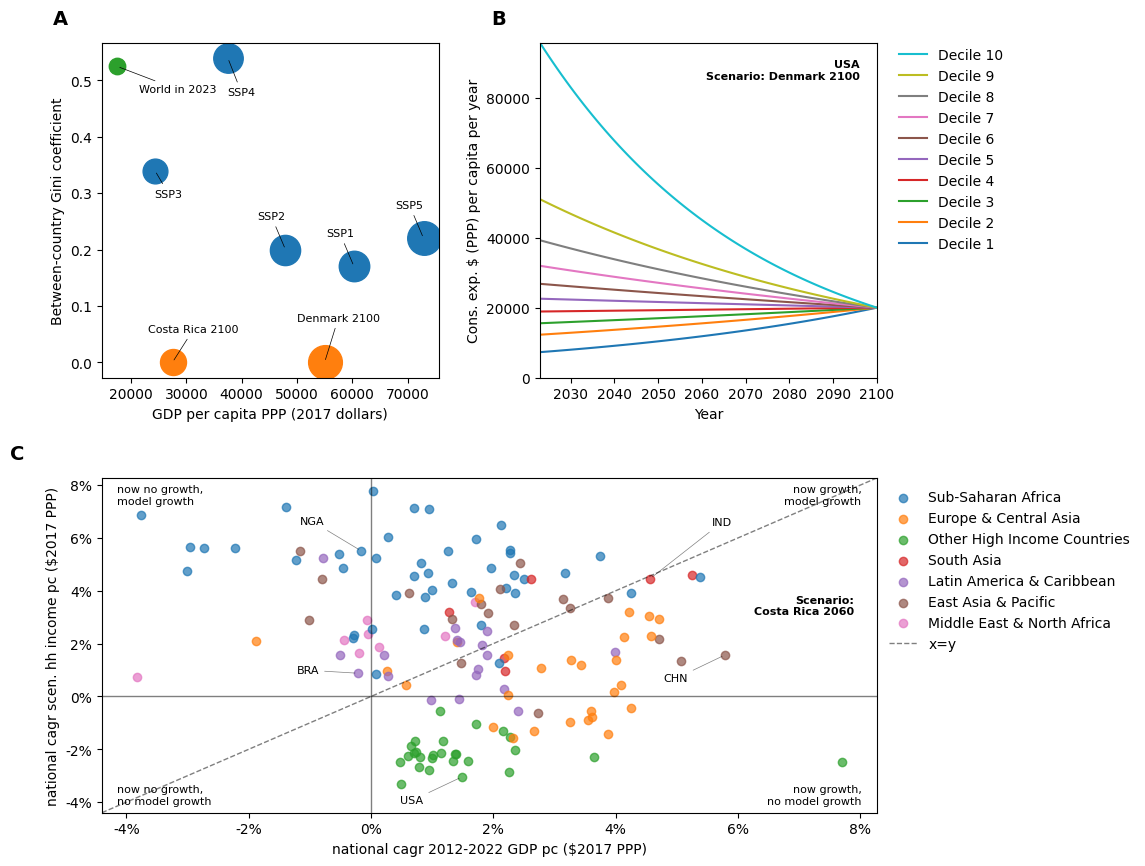

In [2]:

from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm


scenario_params = {"end_year": 2100,
                   "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150, # in terms of GtCO2 that is gigatons of CO2   
                    "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on     
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", #this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", #this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", #this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "k": 0.05,
                   "t0": 2060,
                   "final_improvement_rate": -0.05,
                   "population_hysteresis_assumption": "on" # this is a string an
            
            }

scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
scenario_1.run()

plotting_1 = Plots(scenario_1) # the current scenario must be passed to the plotting class to be able to plot the results


# Adjust figure size and create a grid layout for subplots
fig = plt.figure(figsize=(10, 10))

gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)  # Three rows, two columns

# Assign subplots to the grid
ax1 = fig.add_subplot(gs[0, 0])  # Panel A
ax2 = fig.add_subplot(gs[0, 1])  # Panel B
ax3 = fig.add_subplot(gs[1:, 0:])  # Panel for the third plot, spanning the second and third rows

# Plot the first panel
# Import the data
scenario_classification_inequality = pd.read_csv('./data/scenario_classification_inequality.csv', sep=';')

# Predefined label positions for each scenario
label_positions = {
    'SSP1': (0.05, 0.05),
    'SSP2': (0.05, 0.05),
    'SSP3': (5000, -0.05),
    'SSP4': (5000, -0.07),
    'SSP5': (0.05, 0.05),
    'Denmark 2100': (10000, 0.07),
    'Costa Rica 2100': (12000, 0.05),
    'World in 2023': (18000, -0.05)

}

category_color_mapping = {category: color for category, color in zip(scenario_classification_inequality['category'].unique(), cm.tab10.colors)}
categories_appeared = set()

for scenario in scenario_classification_inequality['scenario_name'].unique():
    scenario_data = scenario_classification_inequality[scenario_classification_inequality['scenario_name'] == scenario]
    category = scenario_data['category'].values[0]
    
    if category in categories_appeared:
        label = None
    else:
        label = category
        categories_appeared.add(category)

    size = scenario_data['total_gdp'] / 1e12  # Adjust size for visibility if necessary
    
    # Plot each scenario
    scatter = ax1.scatter(scenario_data['GDPpc'], 
                         scenario_data['between_country_gini'],
                         s=size,
                         color=category_color_mapping[category],
                         label=label)
    
    # Manually set the position of the text for each scenario using predefined offsets
    for i, txt in enumerate(scenario_data['scenario_name']):
        offset = label_positions.get(txt)  # Use predefined offset or default
        x_position = scenario_data['GDPpc'].values[i] + offset[0]
        y_position = scenario_data['between_country_gini'].values[i] + offset[1]
        # Draw line from marker to text
        ax1.annotate(txt, 
                    xy=(scenario_data['GDPpc'].values[i], scenario_data['between_country_gini'].values[i]), 
                    xytext=(x_position, y_position),
                    textcoords="data",
                    ha='right', 
                    va='bottom',
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5),
                    fontsize=8)

# Label the axes
ax1.set_xlabel('GDP per capita PPP (2017 dollars)')
ax1.set_ylabel('Between-country Gini coefficient')

# now plot the second panel
# using plotting_1 
test_country = "United States"
plotting_1.plot_only_deciles(test_country, ax2)

# Annotate panels
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax3.text(-0.1, 1.1, 'C', transform=ax3.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')


# annotate right panel upper right corner with the country name USA and the year 2100 and the convergence scenario "Denmark 2100"
ax2.text(0.95, 0.95, 'USA\nScenario: Denmark 2100', transform=ax2.transAxes, fontsize=8, fontweight='bold', va='top', ha='right')



# set up a costa rica scenario
scenario_params_cr = {"end_year": 2060,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on        
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "UN_medium", #this is a string and either (1) UN_medium or (2) semi_log_model for details see the scenario_class.py file
                   "tech_evolution_assumption": "plausible", #this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", #this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "k": 0.05,
                   "t0": 2060,
                   "final_improvement_rate": -0.05,
                   "population_hysteresis_assumption": "on" # this is a string an
            
            }

# run the costa rica scenario
scenario_cr = Scenario(scenario_params_cr)
scenario_cr.run()
# plot a third panel in the lower left corner


Plots(scenario_cr).plot_growth_rates_vs_reality(ax=ax3) # Plot for Costa Rica scenario
# annotate the third panel so ax3 with "Scenario: Costa Rica 2060"
ax3.text(0.97, 0.65, 'Scenario:\nCosta Rica 2060', transform=ax3.transAxes, fontsize=8, fontweight='bold', va='top', ha='right')


# save the figure
plt.savefig('fig2.png', dpi=300, bbox_inches='tight')


plt.show()